
# Projet 1 : Étudier un ensemble de données - [noshowappointments-kagglev2-may-2016]

## Sommaire
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Préparation des données</a></li>
<li><a href="#eda">Exploration des données</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## I) Introduction
### A propos des données
C'est un ensemble de données rassemblant des rendez-vous médicaux au Brésil. Parmis ces rendez-vous, il y eu des patients qui sont venus et ceux qui ne sont pas venus. La question qui se pose ici est donc : ***POURQUOI certains sont venus à leur rendez-vous médical et d'autres non ?***.

Pour pouvoir répondre à cette question, plusieurs métadonnées ont été collectées (Age, Localisation de l'hôpital, jour de la prise de RDV, Jour du RDV, etc.).

###  *" Question fondamentale "*
Une question fondamentale se pose donc :

> ***QUELLES SONT LES VARIABLES DETERMINANTES QUI PERMETTENT DE CLASSER LES PATIENTS QUI ONT REPECTE OU NON LEUR RENDEZ-VOUS, ET AINSI DONC PREDIRE, SI UN PATIENT VIENDRAIT FORT PROBABLEMENT A UN RENDEZ-VOUS OU PAS ?***

**Remarque** : Cette question fondamentale sera divisée en plusieurs sous-questions après avoir fait un bref aperçu des données.
Ces questions seront posées avant le processus de nettoyage.

<a id='wrangling'></a>
## II) Préparation des données
### Bref aperçu de données
**Importation des bibliothèques et du dataset**

In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd               #Pour les data
import numpy as np                #Pour les calculs mathématiques spécifiques
import matplotlib.pyplot as plt   # Pour les graphiques
import scipy.stats as st          #Pour les manipulations statistiques
%matplotlib inline
import warnings               
warnings.filterwarnings('ignore') #Pour supprimer les messages d'avertissements pour les codes qui fonctionnent


df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [2]:
#Aperçu des données
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [3]:
df.nunique()  #observer le nombre de valeurs unique pour chaque colonne

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [4]:
df.describe() #Résumé statistique des données
#nous remarquons une anomalie avec la valeur minimale pour la colonne "Age"
#Nous allons essayer de compter le nombre de patient ayant cette valeur

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
df.query('Age=="-1"')['Age'].count()

1

### Constats et remarques
Donc là nous sommes face à un dataframe composé de 110 527 lignes et 14 colonnes dont aucune valeur manquante.

**Remarques** :

**1)** La colonne " ***PatientId*** " contient 62 299 valeurs uniques. Cela signifie qu'il y aurait des patients qui ont eu plusieurs RDV.


**2)** La colonne " ***AppointmentDay*** " ne contient que 27 valeurs uniques. Il serait intéressant de voir la distribution des 110 527 valeurs suivant cette variable.


**3)** La colonne " ***PatientId*** " est de type float et ces données sont écrits en écriture scientifique. Après vérification sur un tableur (Excel), les valeurs peuvent être représentées en valeurs entières.

> *Une conversion de la colonne **PatientId** en type int sera donc nécessaire*
>> **Pourquoi ?**
les entiers sont plus recommandés pour ce type de variable

**4)** La colonne " ***ScheduledDay*** " est de type object alors qu'elle exprime la date et l'heure de la prise de RDV.
> *Une conversion de la colonne **ScheduledDay** en type datetime sera donc nécessaire*
>> **Pourquoi ?**
Cela permettrait d'opérer avec les dates et heures pour vérifier s'ils ont une relation avec les tendances de respect de RDV ou non

**5)** La colonne " ***AppointmentDay*** " est de type object alors qu'elle exprime la date du RDV. 
> *Une suppression des heures de la colonne **AppointmentDay** et une conversion en type datetime se fera*
>> **Pourquoi ?**
Vu que cette colonne n'exprime que le jour, l'heure ne sera plus utile.

**6)** Le format des colonnes de maladie des patients est en entier.
> Il serait intéressant de créer une nouvelle colonne contenant la somme des maladies comme cause de rende-vous
>> **Pourquoi ?**
Pour voir s'il y aurait une correlation avec d'autres variables.


**7)** La colonne désignant la présence des patients à leur rendez-vous est en format texte.
> *Il serait plus interessant de changer en numérique*
>> **Pourquoi ?**
Manipuler des valeurs numérique sera plus pratique pour observer les correlations.

### Les sous questions
Après observation des données, répondre à quelques questions vont nous aider à répondre à notre grande question fondamentale :

> **Question 1** : *Est ce qu'il y a une relation entre la tendance du non respect de RDV et les variables suivantes* :
<ul>
    <li>Genre</li>
    <li>Inscription aux aides sociales</li>
    <li>SMS reçu</li>
    <li>Age</li>
    <li>Le nombre de cause maladive pour le RDV (Hypertension, Alcoolisme, Diabetes, Handicape)</li>
</ul>

> **Question 2** : *Est ce qu'il y a une relation entre la tendance du non respect de RDV et/ou plusieurs variables* ?

### Data Cleaning
Les nettoyages que nous allons effectuer sur nos données sont les suivantes :

**1)** Convertir le type valeurs de la colonne **PatientId** en int

**2)** Convertir le type valeurs de la colonne **ScheduledDay** en datetime.

**3)** Supprimer les heures de la colonne **AppointmentDay** ensuite convertir son type en datetime.

**4)** Changer les noms des colonnes en français.

**5)** Créer une nouvelle colonne **Nb_caus_rdv** étant comme la somme des trois valeurs des colonnes **Hipertension**, **Diabetes**, **Alcoholism** et **Handcap**.

**6)** Suppresion de la ligne contenant un âge négatif.

**7)** Création d'une nouvelle colonne **Present_rdv** de type binaire pour exprimer la présence des patients à leur rendez-vous.

In [6]:
# Conversion du type de valeurs de la colonne PatientId en int
df['PatientId'] = df['PatientId'].astype(np.int64)   

df['PatientId'].head()

0     29872499824296
1    558997776694438
2      4262962299951
3       867951213174
4      8841186448183
Name: PatientId, dtype: int64

#### Remarque 
La méthode **astype(int) de PANDAS** formate les valeurs en **int32**, ce qui a rendu les valeurs de cette colonne en entier négatif. Il fallait donc une conversion en **int64**. Pour cela, j'ai trouvé la solution grâce à ce <a href ="https://stackoverflow.com/questions/43956335/convert-float64-column-to-int64-in-pandas"> lien</a>.

In [7]:
# Conversion du type de valeurs de la colonne ScheduledDay en datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])   

df['ScheduledDay'].head()

0   2016-04-29 18:38:08
1   2016-04-29 16:08:27
2   2016-04-29 16:19:04
3   2016-04-29 17:29:31
4   2016-04-29 16:07:23
Name: ScheduledDay, dtype: datetime64[ns]

In [8]:
# Suppression des heures de la colonne AppointmentDay et conversion de son type en datetime
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

df['AppointmentDay'].head()

0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: AppointmentDay, dtype: datetime64[ns]

#### Remarque 
Pour ne conserver que la date, j'ai trouvé la solution grâce à ce <a href ="https://www.web-dev-qa-db-fra.com/fr/python/supprimer-lheure-de-la-variable-date-et-heure-dans-les-pandas/1052503496/"> lien</a>.

La seconde ligne sert à convertir le type en **date**, c'est-à-dire sans cette ligne de code, le type de la variable serait resté en **object**.

In [9]:
#Changement des noms des colonnes en français
df.rename(columns={
    'PatientId':'id_patient' , 'AppointmentID':'id_rdv', 'Gender':'genre' , 'ScheduledDay':'prise_rdv' ,
    'AppointmentDay':'jour_rdv' , 'Age':'age', 'Neighbourhood':'quart_hop' , 'Scholarship':'aide_so' ,
    'Hipertension':'hypertension' , 'Diabetes':'diabetes' , 'Alcoholism':'alcoolisme' , 'Handcap':'handicap' , 
    'SMS_received':'SMS_recu' , 'No-show':'Absent_rdv' 
                  }, inplace=True)

df.head()

,id_patient,id_rdv,genre,prise_rdv,jour_rdv,age,quart_hop,aide_so,hypertension,diabetes,alcoolisme,handicap,SMS_recu,Absent_rdv
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
# Création d'une nouvelle colonne Nb_caus_rdv

df['Nb_caus_rdv'] = df['hypertension'] + df['diabetes'] + df['alcoolisme'] + df['handicap']
df.head()

,id_patient,id_rdv,genre,prise_rdv,jour_rdv,age,quart_hop,aide_so,hypertension,diabetes,alcoolisme,handicap,SMS_recu,Absent_rdv,Nb_caus_rdv
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2


In [11]:
#un petit aperçu des valeurs unique de la nouvelle colonne
df['Nb_caus_rdv'].unique()

array([1, 0, 2, 3, 4, 5], dtype=int64)

In [12]:
#Suppression de la ligne ayant un âge négatif
df.drop(df[df['age']==-1].index, inplace=True)
df.shape

(110526, 15)

In [13]:
#Création de la nouvelle colonne "Present_rdv"
df['Present_rdv'] = df['Absent_rdv'].map({'No':1,'Yes':0}, na_action=None)
df.head(2)

,id_patient,id_rdv,genre,prise_rdv,jour_rdv,age,quart_hop,aide_so,hypertension,diabetes,alcoolisme,handicap,SMS_recu,Absent_rdv,Nb_caus_rdv,Present_rdv
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,1
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,1


#### Remarque 
Pour remplacer les valeurs en numérique, j'ai trouvé la solution grâce à ce <a href ="https://www.delftstack.com/fr/howto/python-pandas/pandas-replace-values-in-column/"> lien</a>.

In [14]:
#Sauvegarde des données après nettoyage
df.to_csv('clean.csv', index=False)

<a id='eda'></a>
## Exploration des données

### Question 1 : *Est ce qu'il y a une relation entre la tendance du non respect de RDV et les variables suivantes*
<ul>
    <li>Genre</li>
    <li>Inscription aux aides sociales</li>
    <li>SMS reçu</li>
    <li>Age</li>
    <li>Les différentes pathologies : Hypertension, Alcoolisme, Diabetes, Handicape</li>
    <li>Le nombre de maladie du patient (Hypertension, Alcoolisme, Diabetes, Handicape)</li>
</ul>

> Dans cette partie nous allons faire des analyses en utilisant des outils de statistiques descriptives. C'est-à-dire, des petits résumés, de simple graphe et test.

In [15]:
#visualisation des données nettoyées
dfc = pd.read_csv('clean.csv')
dfc.head(2)

,id_patient,id_rdv,genre,prise_rdv,jour_rdv,age,quart_hop,aide_so,hypertension,diabetes,alcoolisme,handicap,SMS_recu,Absent_rdv,Nb_caus_rdv,Present_rdv
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29 00:00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,1
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29 00:00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,1


###  **Avant de commencer toute exploration nous allons visualiser la proportion des patients ayant respectés leur rendez-vous**

Text(0.5, 1.0, 'Proportion des rendez-vous qui ont été respectés')

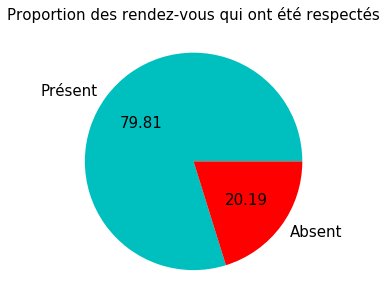

In [16]:
dfc.groupby(['Absent_rdv']).count()['id_rdv'].plot(kind='pie' , autopct="%.2f" ,
                                                          figsize=(5,5) ,fontsize=15, labels=["Présent", "Absent"],
                                                         colors=["c" , "r"])
plt.ylabel(' ')
plt.title('Proportion des rendez-vous qui ont été respectés' ,size = '15')

Nous pouvons constater donc une répartition de **80%** des patients on été **présent** à leur RDV et **20%** ne l'**ont pas respecté**.

Si donc la distribution de ces proportions changent considérablement par rapport à une variable, nous pouvons affirmer qu'il y a une relation entre ces deux variables. Si cela se présente, nous allons confirmer par un test statistique.

La suite des analyse se feront donc ainsi

### Variable en relation à tester : Genre

In [17]:
#Est-ce qu'il y une relation entre les variables genre et Respect du rendez-vous
dfc_F = dfc.query('genre=="F"')
dfc_M = dfc.query('genre=="M"')

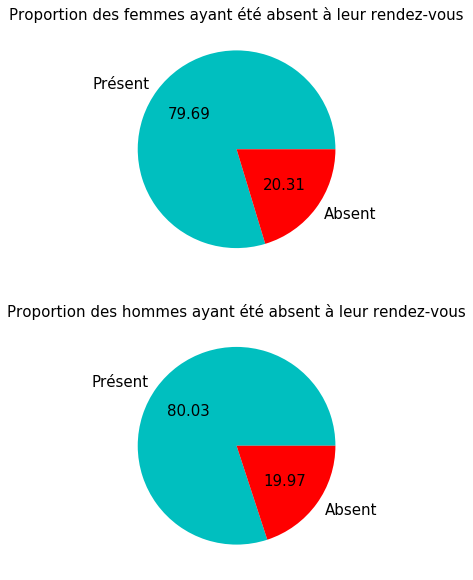

In [18]:
#Graphe pour les femmes
plt.subplot(211)
dfc_F.groupby(['Absent_rdv']).count()['id_rdv'].plot(kind='pie' , autopct="%.2f" ,
                                                          figsize=(10,10) ,fontsize=15, labels=["Présent", "Absent"],
                                                         colors=["c" , "r"])
plt.ylabel(' ')
plt.title('Proportion des femmes ayant été absent à leur rendez-vous',size='15')


#Graphe pour les hommes
plt.subplot(212)
dfc_M.groupby(['Absent_rdv']).count()['id_rdv'].plot(kind='pie' , autopct="%.2f" ,
                                                          figsize=(10,10) ,fontsize=15, labels=["Présent", "Absent"],
                                                         colors=["c" , "r"])
plt.ylabel(' ')
plt.title('Proportion des hommes ayant été absent à leur rendez-vous',size='15')
plt.show()

#### Ce que l'on peut en tirer : 
> *Comme nous pouvons le constater par ces deux graphiques, la proportion des présence n'ont pas vraiment eu de différence dans les deux genres. Donc, le fait que le patient soit un homme ou une femme n'influence pas beaucoup l'absence à son rendez-vous*.

### Variable suivante à tester : aide_so

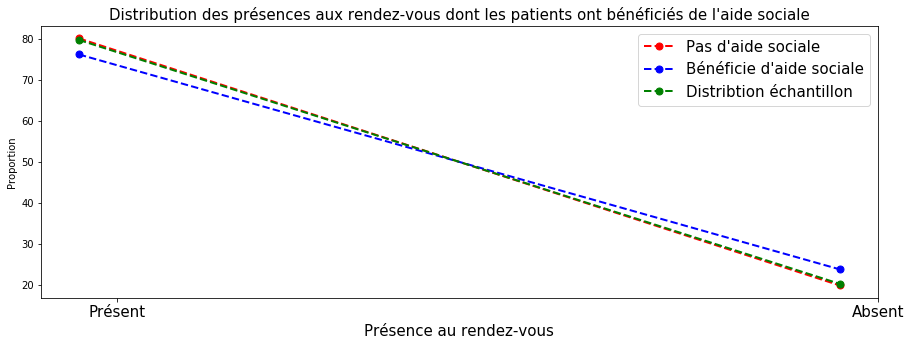

proportion des patients bénéficiant de l'aide sociale est de  9.826647123753688 %


In [20]:
#Relation entre les variables "aide_so"  et Absent_rdv
N = len(dfc)

#Rendez-vous des patients fonction de leur possession d'aide sociale et de leur respect de rdv
Nb_Aide_Abs = dfc.groupby(['aide_so','Absent_rdv']).count()['id_rdv'] 

#Rendez-vous des patients de leur possession d'aide sociale
Nb_Aide = dfc.groupby(['aide_so']).count()['id_rdv']

#proportion du respect de rdv en fonction de leur possession d'aide social
prop = dfc.groupby(['Absent_rdv']).count()['id_rdv']*100/N
prop0 = Nb_Aide_Abs[0]*100 / Nb_Aide[0]
prop1 = Nb_Aide_Abs[1]*100 / Nb_Aide[1]

index = np.arange(len(prop0))  # paramétrage des abcisses


# plot courbe
plt.plot(index, prop0, 'go--', linewidth=2, markersize=7 ,color='r', label="Pas d'aide sociale")
plt.plot(index, prop1, 'go--', linewidth=2, markersize=7 ,color='b', label="Bénéficie d'aide sociale")
plt.plot(index, prop, 'go--', linewidth=2, markersize=7 ,color='g', label='Distribtion échantillon')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Présence au rendez-vous' , size =15)
plt.title("Distribution des présences aux rendez-vous dont les patients ont bénéficiés de l'aide sociale",size=15)
locations = index + 0.10 / 2  # xtick locations
labels = ['Présent', 'Absent']
plt.xticks(locations, labels, size=15)
plt.legend(prop={'size': 15})
plt.rcParams['figure.figsize'] = [15, 5]
plt.show()

#Détermination de la proportion des patients bénéficiant de l'aide sociale
propaide = dfc.query('aide_so ==1')['aide_so'].count()*100/len(dfc)
print("proportion des patients bénéficiant de l'aide sociale est de ",propaide,"%")

#### Commentaires : 
On remarque que les patients ne bénéficiant pas d'aide sociale se comporte identiquement à la grande majorité de la population. Cela peut s'expliquer la faible proportion (9,8%) des gens bénéficiant de cet avantage. Néanmoins, nous remarquons un léger changement sur la distribution sur le respect de rendez-vous des patients inscrits aux aides sociales. 

Pour vérifier si ce changement est suffisant pour dire que les aides sociales ont eu un impact significatif, nous allons procédé à un test de **Khi-2**.

Pour effectuer le test, je me suis fait aidé grâce à ce <a href="https://www.deschamps.io/wp-content/uploads/2019/04/Test-du-khi2.html"> lien</a>.
> Parce que la taille de l'échantillon est très importante, il est fort probable que nous aurions toujours un p-value toujours très bas et rejetions toujours H0, nous allons donc faire le test avec la distribution de leurs proportions.


In [21]:
#Répartition de l'assiduité des patients par rapport à leur RDV
d = dfc.groupby(['Absent_rdv']).count()['id_rdv']*100/N
#Répartition de l'assiduité des patients, ne bénéficiant pas d'aide sociale, par rapport à leur RDV
d0 = Nb_Aide_Abs[0]*100 / Nb_Aide[0]
#Répartition de l'assiduité des patients, bénéficiant pas d'une aide sociale, par rapport à leur RDV
d1 = Nb_Aide_Abs[1]*100 / Nb_Aide[1]

print(st.chi2_contingency([d,d0])[1])     #donne le p_value du test en pourcentage
print(st.chi2_contingency([d,d1])[1])     #donne le p_value du test en pourcentage
print(st.chi2_contingency([d0,d1])[1])    #donne le p_value du test en pourcentage

0.9135790658195817
0.6640639493820903
0.6157779818430793


Avec ces 3 valeurs de **p-value**, nous pouvons affirmer que ces deux variables ne sont pas significativement dépendants.
#### Ce que l'on peut en tirer : 
> *Le comportement des patients, par rapport à leur présence ou absence au rendez-vous, ne présentent pas de dépendance significative avec les aides sociales que l'ensemble des patients reçoivent*.
>> **IMPORTANT** : les tets n'affirment pas que ces variables sont indépendantes.
### Variable suivante à tester : SMS_recu
Puisque cette variable a le même type et les même valeurs uniques que la variable précédente, nous allons utiliser les même approches.

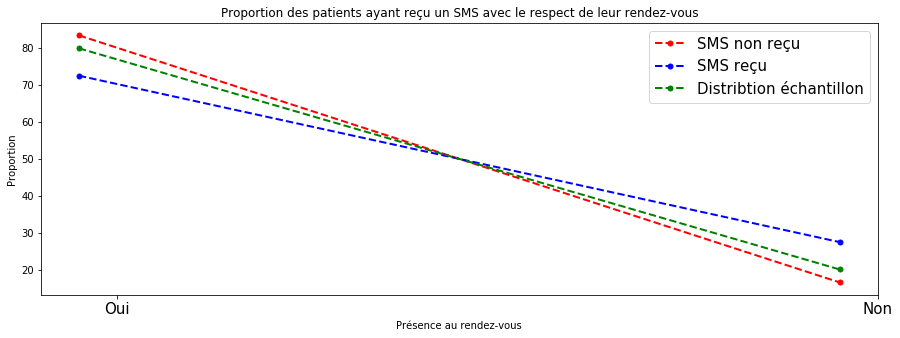

Proportion des patients ayant reçu un SMS est de  32.10285362720084 %


In [22]:
#Relation entre les variables "SMS_recu"  et Absent_rdv

#Rendez-vous des patients fonction de leur reception de reception de SMS et de leur respect de rdv
Nb_sms_Abs = dfc.groupby(['SMS_recu','Absent_rdv']).count()['id_rdv'] 

#Rendez-vous des patients fonction de leur reception de reception de SM
Nb_sms = dfc.groupby(['SMS_recu']).count()['id_rdv']

#proportion du respect de rdv en fonction de leur reception de reception de SM
prop0 = Nb_sms_Abs[0]*100 / Nb_sms[0]
prop1 = Nb_sms_Abs[1]*100 / Nb_sms[1]

index = np.arange(len(prop0))  # paramétrage des abcisses

# plot courbe
plt.plot(index, prop0, 'go--', linewidth=2, markersize=5 ,color='r', label='SMS non reçu')
plt.plot(index, prop1, 'go--', linewidth=2, markersize=5 ,color='b', label='SMS reçu')
plt.plot(index, prop, 'go--', linewidth=2, markersize=5 ,color='g', label='Distribtion échantillon')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Présence au rendez-vous')
plt.title('Proportion des patients ayant reçu un SMS avec le respect de leur rendez-vous')
locations = index + 0.10 / 2  # xtick locations
labels = ['Oui', 'Non']
plt.xticks(locations, labels , size=15)
plt.legend(prop={'size': 15})
plt.rcParams['figure.figsize'] = [15, 5]
plt.show()

#Détermination de la proportion des patients ayant reçu un SMS
propsms = dfc.query('SMS_recu ==1')['SMS_recu'].count()*100/len(dfc)
print("Proportion des patients ayant reçu un SMS est de ",propsms,"%")

#### Commentaires : 
Ce graphe est assez intéressant. On remarque une diminution de l'assiduité pour les patients ayant reçu un sms par rapport aux autres qui n'en ont pas reçu, avec une tendance opposée.

Pour confirmer l'hypothèse que nous venons d'avancer, allons faire un test de Khi2.

In [23]:
#Répartition de l'assiduité des patients par rapport à leur RDV
d = dfc.groupby(['Absent_rdv']).count()['id_rdv']*100/N
#Répartition de l'assiduité des patients, n'ayant pas reçu un SMS, par rapport à leur RDV
d0 = Nb_sms_Abs[0]*100 / Nb_sms[0]
#Répartition de l'assiduité des patients, ayant reçu un SMS, par rapport à leur RDV
d1 = Nb_sms_Abs[1]*100 / Nb_sms[1]

print(st.chi2_contingency([d,d0])[1])     #donne le p_value du test en pourcentage
print(st.chi2_contingency([d,d1])[1])     #donne le p_value du test en pourcentage
print(st.chi2_contingency([d0,d1])[1])    #donne le p_value du test en pourcentage

0.6498924036047246
0.2899401059274364
0.09273310296661869


<a id='conclSMS'></a>
Donc là, nous avons des résultats assez mitigés. Le **p-value** pour les disctributions des patients ayant et n'ayant pas reçu de SMS nous donne une valeur inférieure à 10%, ce qui pourrait nous donner une raison de penser qu'il y a eu une dépence avec la recpetion de SMS et le respect du rendez-vous avec une certitude de 90%.

Afin d'enlever notre confusion, nous allons effectuer **un second test  :**  nous allons voir la correlation entre les variables **SMS_recu** et **Present_rdv** pour l'ensemble des rendez-vous effectués.

> *Pour calculer le coefficient de correlation, j'ai trouvé la solution grâce à ce <a href="https://moonbooks.org/Articles/Comment-calculer-le-coefficient-de-correlation-de-Pearson-en-python-/">lien</a>*

In [24]:
np.corrcoef(dfc['SMS_recu'],dfc['Present_rdv'])[1][0]

-0.1264279432991247

Nous pouvons constater par ce résultat, la tendance des patients ayant reçu un SMS à ne pas venir à leur rendez-vous **(signe négatif du coef corr)**. Mais la valeur du coefficient de correlation ne reflette pas une existence d'une quelconque correlation significative entre ces deux variables

Donc, l'ensemble des résultats nous affirme que le niveau de dépendance entre la réception de SMS et la présence des patients à leur rendez-vous n'est pas encore statistiquement significatif.
#### Ce que l'on peut en tirer : 
> *Nous ne pouvons pas donc suffisament affirmer que le fait d'avoir reçu un SMS modifie considérablement la tendance de l'ensemble des patients à s'absenter à leur rendez-vous*.

### Variable suivante à tester : age
Dans cette partie, nous allons répartir les patients en plusieurs classe d'âge.

Nous allons commencer par refaire une petite visulations de la variable et comment l'échantillon est distribuée selon elle

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

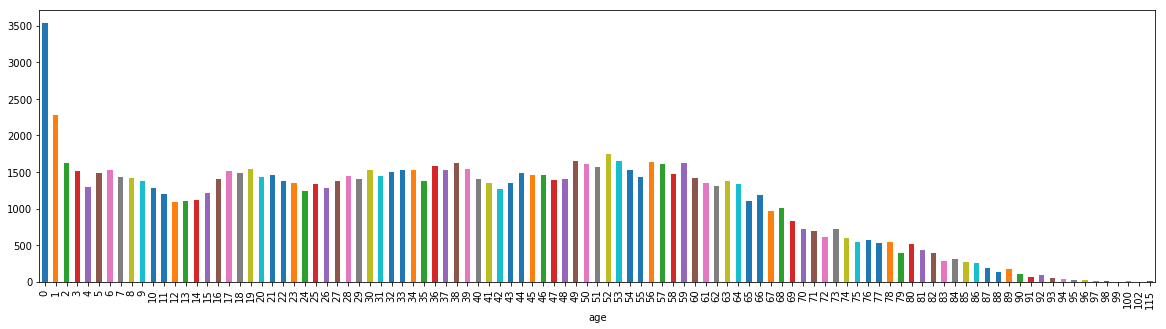

In [25]:
dfc.groupby(['age']).count()['id_rdv'].plot(kind='bar' , figsize=(20,5))
dfc['age'].describe()

Nous allons classer les âges des patients suivant ceci :

**Bebe       :** Strictement inférieur à 5 ans

**Enfant     :** Entre 5ans et 12 ans

**Adolescent :** Entre 12 ans et 20 ans

**Jeune      :** Entre 20 ans et 30 ans

**Adulte     :** Entre 30 ans et 50 ans

**Agee       :** Entre 50 ans et 65 ans

**Vieux      :** Supérieure à 65 ans

In [26]:
#Nous allons créer une nouvelle colonne Classe_age pour les assigner sur chaque patient
#définition des seuils pour chaque classe
seuil = [0, 5 ,12 ,20 ,30 ,50 , 65 , 115]

#Nom de chaque classe
Nom_classe = ['bebe' ,'enfant' ,'ado' ,'jeune' ,'adulte' , 'agee' , 'vieux']

#Création de la nouvelle colonne classe_age
dfc['classe_age'] = pd.cut(dfc['age'], seuil, labels=Nom_classe)

dfc.head()

,id_patient,id_rdv,genre,prise_rdv,jour_rdv,age,quart_hop,aide_so,hypertension,diabetes,alcoolisme,handicap,SMS_recu,Absent_rdv,Nb_caus_rdv,Present_rdv,classe_age
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29 00:00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,1,agee
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29 00:00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,1,agee
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29 00:00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,1,agee
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29 00:00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,1,enfant
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29 00:00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2,1,agee


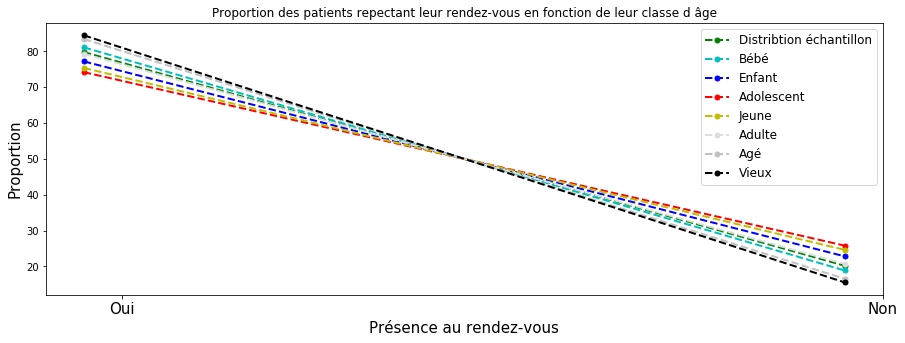

In [27]:
#Relation entre les variables "Classe_age"  et Absent_rdv

#Rendez-vous des patients en fonction de leur classe d'âge et de leur respect de rdv
Nb_cla_Abs = dfc.groupby(['classe_age','Absent_rdv']).count()['id_rdv'] 

#Rendez-vous des patients de leur classe d'âge
Nb_cla = dfc.groupby(['classe_age']).count()['id_rdv']

#proportion du respect de rdv en fonction de leur classe d'âge
prop = dfc.groupby(['Absent_rdv']).count()['id_rdv']*100/N
prop0 = Nb_cla_Abs[0]*100 / Nb_cla[0] , Nb_cla_Abs[1]*100 / Nb_cla[0]
prop1 = Nb_cla_Abs[2]*100 / Nb_cla[1] , Nb_cla_Abs[3]*100 / Nb_cla[1]
prop2 = Nb_cla_Abs[4]*100 / Nb_cla[2] , Nb_cla_Abs[5]*100 / Nb_cla[2]
prop3 = Nb_cla_Abs[6]*100 / Nb_cla[3] , Nb_cla_Abs[7]*100 / Nb_cla[3]
prop4 = Nb_cla_Abs[8]*100 / Nb_cla[4] , Nb_cla_Abs[9]*100 / Nb_cla[4]
prop5 = Nb_cla_Abs[10]*100 / Nb_cla[5] , Nb_cla_Abs[11]*100 / Nb_cla[5]
prop6 = Nb_cla_Abs[12]*100 / Nb_cla[6] , Nb_cla_Abs[13]*100 / Nb_cla[6]


#index = np.arange(len(prop0))  # paramétrage des abcisses

# plot courbe
plt.plot(index, prop, 'go--', linewidth=2, markersize=5 ,color='g', label='Distribtion échantillon')
plt.plot(index, prop0, 'go--', linewidth=2, markersize=5 ,color='c', label='Bébé')
plt.plot(index, prop1, 'go--', linewidth=2, markersize=5 ,color='b', label='Enfant')
plt.plot(index, prop2, 'go--', linewidth=2, markersize=5 ,color='r', label='Adolescent')
plt.plot(index, prop3, 'go--', linewidth=2, markersize=5 ,color='y', label='Jeune')
plt.plot(index, prop4, 'go--', linewidth=2, markersize=5 ,color='555555', label='Adulte')
plt.plot(index, prop5, 'go--', linewidth=2, markersize=5 ,color='999999', label='Agé')
plt.plot(index, prop6, 'go--', linewidth=2, markersize=5 ,color='k', label='Vieux')


# title and labels
plt.ylabel('Proportion' , size =15)
plt.xlabel('Présence au rendez-vous' , size =15)
plt.title('Proportion des patients repectant leur rendez-vous en fonction de leur classe d âge')
locations = index + 0.10 / 2  # xtick locations
labels = ['Oui', 'Non']
plt.xticks(locations, labels, size =15)
plt.legend(loc=1, prop={'size': 12})
plt.rcParams['figure.figsize'] = [15, 5]
plt.show()

In [28]:
#calcul du p-value de Khi2
### On remarque que la distribution des valeurs pour les jeunes et les vieux sont les plus éloignées.
## Nous allons donc faire un test si ce changement est significatif ou non

print('La valeur du p-value = ',st.chi2_contingency([prop2,prop6])[1])

##Donc là on peut rejeté l'hypothèse qu'il y ait une dépendance entre l'âge
## Vu que la classe ayant le plus d'écart ne présente pas de changement significatif

La valeur du p-value =  0.10574003037350775


#### Commentaires : 
D'après ce graphique, on peut remarquer les tendances similaire des jeunes et adolescents par rapport aux absences à leur rendez-vous. Une tendance opposé est par contre vue pour les patients agés et vieux. Cela peut s'expliquer par le fait que les personnes agées sont plus soucieux de leur santé que les jeunes.

D'un autre part, la présence des enfants et les bébés à leur rendez-vous, est très similaire à l'ensemble de l'échantillon. Cela peut s'expliquer par le fait que ces patients sont généralement survéllés par leurs parents.

Néanmoins, notre test nous affirme que le niveau de dépendance n'est pas encore statistiquement significatif.
#### Ce que l'on peut en tirer : 
> *On ne peut pas encore affirmer, avec le test effectué, qu'il y ait une dépendance entre la variable classe d'âge et le respect de rendez-vous, mais nous pouvons déjà signaler les similitudes de comportement entre les classes*.

### Variable suivante à tester : Nb_caus_rdv
Avec cette variable, nous allons observer s'il y a une correlation entre le nombre de maladie du patient et son assiduité à respecter son rendez-vous.

Nous allons donc utiliser la variable **Present_rdv**

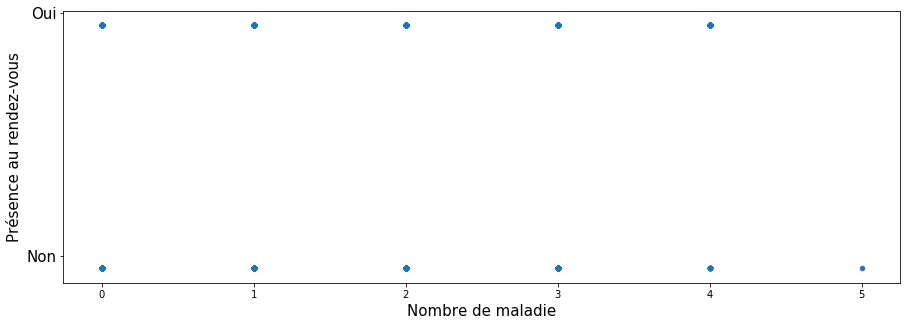

In [29]:
## Nuage des points
dfc.plot(kind='scatter', y = 'Present_rdv' , x = 'Nb_caus_rdv')
plt.ylabel('Présence au rendez-vous' , size =15)
plt.xlabel('Nombre de maladie' , size =15)
plt.yticks(locations,['Non','Oui'], size =15 )
plt.rcParams['figure.figsize'] = [15, 3]
plt.show()

#### Commentaires : 
A priori, on ne remarque aucune correlation avec ces deux variables. Nous allons calculer leur coefficient de correlation pour confirmer cette hypothèse. 

In [30]:
np.corrcoef(dfc['Nb_caus_rdv'],dfc['Present_rdv'])[1][0]

0.03031995630402466

Néanmoins, notre test nous affirme que le niveau de dépendance n'est pas encore statistiquement significatif.
##### Ce que l'on peut en tirer : 
> *Il n'existe presque aucune relation entre le respect du rendez-vous des patients avec le nombre de leur maladie*.


#### Ce que l'on peut conclure : 
Nous ne pouvons pas encore affirmer la cause principale de la tendance des patients à ne pas respecter leur rendez-vous avec toutes les variables que nous venions de tester.

Allons donc voir si deux variables ensembles pourraient apporter des résultats plus intéressants.

### Question 2 : *Est ce qu'il y a une relation entre la tendance du non respect de RDV et/ou plusieurs variables ?*

Dans cette partie, nos analyses se feront par des ACP (cela nous permettre de visualiser grâce à un seul graphique les relations entre les variables). Le cercle de correlation nous déterminera les variables qui sont les plus liées ou pas.

> *Voici les liens qui m'ont aidé à réaliser l'ACP* :
   <li> <a href="https://fxjollois.github.io/cours-2019-2020/lp-iot--python-ds/seance2-ACP-classif.html">Code Python</a>
   <li> <a href="https://datascience-stackexchange-com.translate.goog/questions/39898/sklearn-decomposition-pca-explained-variance-ratio-attribute-does-not-exist?_x_tr_sl=en&_x_tr_tl=fr&_x_tr_hl=fr&_x_tr_pto=sc">Solution bug</a>
   <li> <a href="https://www.soft-concept.com/surveymag/comment-lire-une-acp.html">Documentation théorique</a>
  

Rappelons que nous avons 110 527 rendez-vous au total et 62 299 patients. Donc il y a eu certains patient qui sont venus plusieurs fois.

Nous allons,tout d'abord commencer notre ACP dont les individus sont tous les rendez-vous, et ensuite, les patients. Après nous verrons quelle autres variables seront intéressantes qui seront définies comme individues dans notre ACP.

In [31]:
# Importation des bibliothèse pour l'ACP
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110526 entries, 0 to 110525
Data columns (total 17 columns):
id_patient      110526 non-null int64
id_rdv          110526 non-null int64
genre           110526 non-null object
prise_rdv       110526 non-null object
jour_rdv        110526 non-null object
age             110526 non-null int64
quart_hop       110526 non-null object
aide_so         110526 non-null int64
hypertension    110526 non-null int64
diabetes        110526 non-null int64
alcoolisme      110526 non-null int64
handicap        110526 non-null int64
SMS_recu        110526 non-null int64
Absent_rdv      110526 non-null object
Nb_caus_rdv     110526 non-null int64
Present_rdv     110526 non-null int64
classe_age      106987 non-null category
dtypes: category(1), int64(11), object(5)
memory usage: 13.6+ MB


In [32]:
# Sélection des variables de type numérique
df_ACP = dfc.groupby('id_rdv')['age','aide_so','hypertension', 'diabetes', 'alcoolisme',
                               'handicap', 'SMS_recu', 'Nb_caus_rdv', 'Present_rdv'].sum()


df_transform = StandardScaler().fit_transform(df_ACP)
acp = PCA(n_components=df_ACP.shape[1]).fit(df_transform) #Les résultats de l'ACP seront contenu dans l'objet acp

In [33]:
#Visualisation des valeurs propre et leur pourcentage d'inertie
Tableau_Vp = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(df_ACP.shape[1])], 
        "Valeur propre" : np.around(acp.explained_variance_,decimals=2),
        "% d'intertie" : np.around(acp.explained_variance_ratio_ * 100,decimals=1),
        "% d'inertie cum" : np.around(np.cumsum(acp.explained_variance_ratio_) * 100,decimals=1)
    }
)
Tableau_Vp

,Dimension,Valeur propre,% d'intertie,% d'inertie cum
0,Dim1,2.78,30.9,30.9
1,Dim2,1.13,12.5,43.4
2,Dim3,1.06,11.8,55.2
3,Dim4,1.00,11.1,66.3
4,Dim5,0.96,10.6,76.9
5,Dim6,0.87,9.7,86.6
6,Dim7,0.72,8.0,94.6
7,Dim8,0.49,5.4,100.0
8,Dim9,0.00,0.0,100.0


#### Remarques : 
Nous pouvons observer ici que les deux première dimensions n'arrive à représenter que 43% de toute l'information,avec la troisième, que 55%. Ceci s'explique par la grande quantité des individus (ici les différents rendez-vous).

Nous allons donc passer par l'analyse suivante, en regroupant donc les rendez-vous par patients.

> *Vu que nous allons à présent utiliser plus souvent les ACP, nous allons créer des fonctions pour cela*

In [34]:

#Fonction pour la création de l'objet acp pour contenir toutes les données pour l'ACP
def ACP(df_ACP):
    df_transform = StandardScaler().fit_transform(df_ACP)
    acp = PCA(n_components=df_ACP.shape[1]).fit(df_transform) 
    
    return acp

# Fonction pour le tableau d'inertie des valeurs propres
def Tableau_VP(df_ACP):
    
    acp = ACP(df_ACP)
    Vp = pd.DataFrame(
        {
            "Dimension" : ["Dim" + str(x + 1) for x in range(df_ACP.shape[1])], 
            "Valeur propre" : np.around(acp.explained_variance_,decimals=2),           #Fonction qui arrondie avec 2 chiffres après la virgule
            "% d'intertie" : np.around(acp.explained_variance_ratio_ * 100,decimals=1),
            "% d'inertie cum" : np.around(np.cumsum(acp.explained_variance_ratio_) * 100,decimals=1)
        }
    )
    
    return Vp

#Fonction qui calcul les nouvelles coordonnées pour chacune des dimensions
def Coord(df_ACP):
    n = df_ACP.shape[0] # nombre d'individus
    p = df_ACP.shape[1] # nombre de variables

    acp= ACP(df_ACP)
    Vp = (n-1) / n * acp.explained_variance_     # valeurs propres
    sqrt_Vp = np.sqrt(Vp)                        # racine carrée des valeurs propres
    corvar = np.zeros((p,p))                     # Matrice de coordonnées
    for k in range(p):
        corvar[:,k] = np.around(acp.components_[k,:] * sqrt_Vp[k],decimals=2) #arrondie avec 2 chiffres après la virgule
    
    coordvar = pd.DataFrame({'Variable': df_ACP.columns, 'COR_1': corvar[:,0], 'COR_2': corvar[:,1],'COR_3': corvar[:,2]
                             , 'COR_4': corvar[:,3],'COR_5': corvar[:,4]
                            })
    
    return coordvar

#Fonction pour le traçage du cercle de correlation
def Cercle_Corr(df_ACP,x,y) : #ici x et y représente la dimension que l'on souhaite projeté les nouvelles coord
    coordvar =  Coord(df_ACP)
    pourcent = np.around(Tableau_VP(df_ACP)["% d'intertie"][x-1] + Tableau_VP(df_ACP)["% d'intertie"][y-1],decimals=2)
    p = len(coordvar)
    fig, axes = plt.subplots(figsize = (6,6))
    fig.suptitle("Cercle des corrélations Dim"+str(x)+" et Dim"+str(y)+" "+str(pourcent)+"%")
    axes.set_xlim(-1, 1)
    axes.set_ylim(-1, 1)
    # Ajout des axes
    axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 2)
    axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 2)

# Ajout des noms des variables, ICI donc nous allons nous contenter des 3 premières dimensions au maximum
#Vu qu'en princpe, on devrais toujours nous contenter des deux premières
    if x==1 :
        if y==2:
            for j in range(p):
                axes.text(coordvar["COR_1"][j],coordvar["COR_2"][j], j, size=12)
        else:
            for j in range(p):
                axes.text(coordvar["COR_1"][j],coordvar["COR_3"][j], j, size=12)
    else:
        for j in range(p):
                axes.text(coordvar["COR_2"][j],coordvar["COR_3"][j], j, size=12)
            
        
    # Ajout du cercle
    plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))
    plt.show()
    
    
    return coordvar.iloc[:,[0,x,y]] #Pour afficher que les coordonnées avec les axes X et y choisis en argument

In [35]:
## Vu que les variables numériques étant binaires, sauf l'âge, nous n'allons pas le considérer
##Car nous allons faire la somme de ces valeurs binaire pour comptabiliser le score de chaque patient pour chacune de ces
## variables

df_ACP_patient = dfc.groupby('id_patient')['aide_so','hypertension', 'diabetes', 'alcoolisme',
                               'handicap', 'SMS_recu', 'Nb_caus_rdv', 'Present_rdv'].sum()

#Visualisation du tableau d'inertie des valeurs propres
Tableau_VP(df_ACP_patient)

,Dimension,Valeur propre,% d'intertie,% d'inertie cum
0,Dim1,2.82,35.3,35.3
1,Dim2,1.25,15.7,50.9
2,Dim3,1.02,12.8,63.7
3,Dim4,0.98,12.2,75.9
4,Dim5,0.89,11.1,87.0
5,Dim6,0.54,6.8,93.8
6,Dim7,0.50,6.2,100.0
7,Dim8,0.00,0.0,100.0


#### Remarques : 
Nous pouvons observer ici que les deux première dimensions n'arrive à représenter que 51% de toute l'information. De plus, les 3 premières dimensions ont des valeurs propres supérieures à 1. Nous allons donc faire deux projection **(Dim1 et Dim2, ensuite Dim1 et Dim3)**

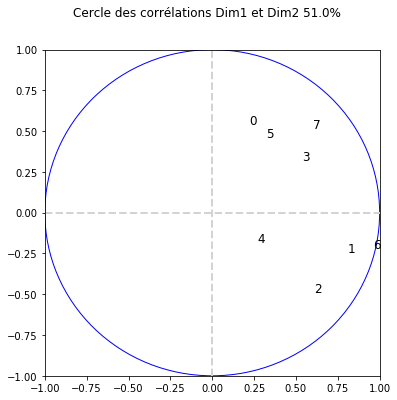

,Variable,COR_1,COR_2
0,aide_so,0.22,0.54
1,hypertension,0.81,-0.24
2,diabetes,0.61,-0.49
3,alcoolisme,0.54,0.32
4,handicap,0.27,-0.18
5,SMS_recu,0.32,0.46
6,Nb_caus_rdv,0.96,-0.22
7,Present_rdv,0.60,0.52


In [36]:
# Tracage du cercle de correlation Dim1 et Dim2
Cercle_Corr(df_ACP_patient,1,2)

#### Commentaires : 
Nous avons ici 3 variables qui sont plus ou moins bien expliquées par les deux axes (L'**hypertension**, **Nombre de cause rdv** et La **présence** au rendez-vous. Les variables sont un peu éparpillées dans le cercle, nous ne pouvons donc pas trop souligner une relation entre elles pour l'instants.

Allons voir leur projection avec les axes 1 et 3.

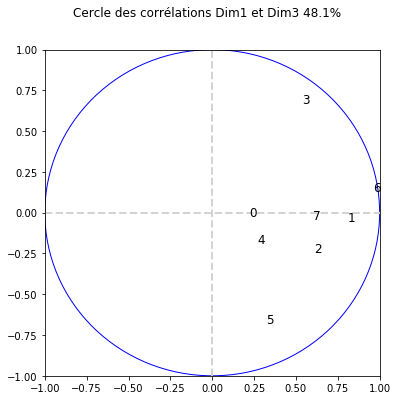

,Variable,COR_1,COR_3
0,aide_so,0.22,-0.02
1,hypertension,0.81,-0.05
2,diabetes,0.61,-0.24
3,alcoolisme,0.54,0.67
4,handicap,0.27,-0.19
5,SMS_recu,0.32,-0.68
6,Nb_caus_rdv,0.96,0.13
7,Present_rdv,0.60,-0.04


In [37]:
# Tracage du cercle de correlation Dim1 et Dim2
Cercle_Corr(df_ACP_patient,1,3)

#### Commentaires : 
Cette deuxième représentation ne pourra pas nous apporter d'information fiable puisqu'elle représente moins de **50%** de toute l'information.

Pour remédier à cela, nous allons calculer la distance eucludienne (en 5 dimensions) de la variable **Present_rdv** par rapport aux autres variables. 

> ***Rappelons que nous nous plaçons dans une sphère à 5 dimensions de rayon 1, donc la distance maximale, entre deux points, appartenant à cette sphère sera de 2 et la distance minimale sera évidemment de 0***.

<ul>
<li><i>Une distance proche très proche de 0, lorsque l'une des coordonnées des variables est proche de 1, exprime une correlation positive forte</i></li>

<li><i>Une distance proche très proche de 2 exprime une correlation négative forte</i></li>

<li><i>Une distance proche très proche de 1 exprime une correlation faible</i></li>
</ul>

Avec cela, les variables qui auront la plus petite distance seront les variables qui sont correlées positivement avec la variable en question.

In [38]:
#Nous allons donc créer une fonction pour tracer ce tableau de distance
def Tableau_distance(df_ACP):
    corvar = Coord(df_ACP)
    p = len(corvar)-1

    corrd_Pres = pd.DataFrame({'id': df_ACP.columns, 'COR_1': corvar['COR_1'][p], 'COR_2': corvar['COR_2'][p],
                                                     'COR_3': corvar['COR_3'][p], 'COR_4': corvar['COR_4'][p],
                                                     'COR_5': corvar['COR_5'][p]})
    dist = np.zeros(p+1)

    for x in range(p+1):
        dist[x] = np.around(
                  dist[x] + np.sqrt((corvar['COR_1'][x] - corrd_Pres['COR_1'][p])**2 
                          + (corvar['COR_2'][x] - corrd_Pres['COR_2'][p])**2 
                          + (corvar['COR_3'][x] - corrd_Pres['COR_3'][p])**2
                          + (corvar['COR_4'][x] - corrd_Pres['COR_4'][p])**2 
                          + (corvar['COR_5'][x] - corrd_Pres['COR_5'][p])**2
                               )
                            ,decimals=2)
    
    return pd.DataFrame({'Variable': df_ACP.columns, 'Distance': dist }).sort_values(by=['Distance'],ascending=True)

Tableau_distance(df_ACP_patient)

,Variable,Distance
7,Present_rdv,0.00
5,SMS_recu,0.73
3,alcoolisme,0.74
6,Nb_caus_rdv,0.87
1,hypertension,0.88
0,aide_so,1.10
2,diabetes,1.15
4,handicap,1.19


#### Commentaires : 
Ce graphe nous offre comme information supplémentaire :

La distance de la variable **Present_rdv** avec les autres variables sont toutes dans le voisinage de 1. Cela explique l'éparpillement des variables avec notre premier cercle de correlation.

Donc si l'on regroupe chaque rendez-vous au patient qui lui est attribué, on observe pas trop de correlation entre la présence des patients à leur rendez-vous par rapport aux autres variables étudiées ici.

#### Ce que l'on peut conclure : 
> *Pour l'ensemble des patients (**Tout âge confondu, dans n'importe quel quartier de l'hôpital, peu importe la date du rendez-vous et de sa prise**), leur **comportement** par rapport à leur **présence à leur rendez-vous** ne peuvent **pas trop s'expliquer fiablement** par le fait qu'ils ont reçu un **SMS**, ou bien qu'il soit bénéficiaire d'une **aide sociale**, ou encore qu'il soit **alcoolique** ou atteint d'une maladie citée ici (**diabètes, Hypertension, Handicap**).*

Nous allons maintenant regrouper chaques rendez-vous en fonction des classe d'âge des patients pour essayer d'observer la relation entre les variables en fonction de cela.
### Variable suivante à explorer : Classe_age

In [39]:
#regroupons d'abord nos données par quartier de l'hôpital
df_class_age = dfc.groupby('classe_age')['aide_so','hypertension', 'diabetes','alcoolisme',
                               'handicap', 'SMS_recu', 'Present_rdv'].sum()

## Nous n'avons pas insérer la variable 'nb_cause_rdv' car elle est la somme des valeurs de 3 autres variables
##Et parce que nous n'avons que 7 classe d'âge, et il faut que le nombre de variable soit inférieure ou égale 
## AU nombre d'individu

df_class_age.head(7)

,aide_so,hypertension,diabetes,alcoolisme,handicap,SMS_recu,Present_rdv
classe_age,,,,,,,
bebe,729,1,3,2,15,2238,6646
enfant,1305,11,16,11,108,3030,7183
ado,1473,37,42,22,240,3315,8023
jeune,1701,315,107,240,194,4799,10389
adulte,4114,4598,1354,1466,620,9781,23370
agee,1236,8855,3314,1310,596,7424,18461
vieux,251,7984,3107,309,685,3998,11235


In [40]:
Tableau_VP(df_class_age)

,Dimension,Valeur propre,% d'intertie,% d'inertie cum
0,Dim1,5.91,72.3,72.3
1,Dim2,2.06,25.3,97.6
2,Dim3,0.18,2.2,99.8
3,Dim4,0.01,0.1,99.9
4,Dim5,0.00,0.0,100.0
5,Dim6,0.00,0.0,100.0
6,Dim7,0.00,0.0,100.0


#### Commentaires : 
Ici donc, les deux premières dimensions nous suffiront pour exploiter fiablement les relations entre les variables. Nous n'aurons besoin que d'un seul cercle de correlation.

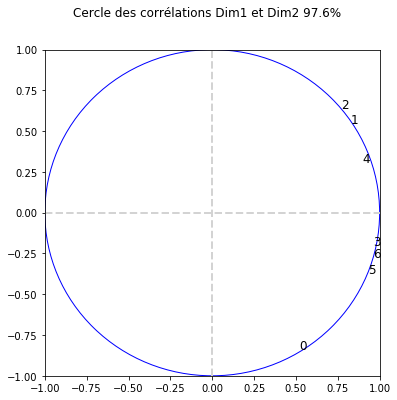

,Variable,COR_1,COR_2
0,aide_so,0.52,-0.84
1,hypertension,0.83,0.55
2,diabetes,0.77,0.64
3,alcoolisme,0.96,-0.20
4,handicap,0.90,0.31
5,SMS_recu,0.93,-0.37
6,Present_rdv,0.96,-0.27


In [41]:
Cercle_Corr(df_class_age,1,2)

#### Commentaires : 
Les informations que nous apporte ce graphe:

<ul>
    <il>Deux variables sont fortement correlées positivement avec la variable <b>Present_rdv</b>, à savoir : <b>alcoolisme</b> et <b>SMS_recu</b>.</il>

<il>Nous pouvons aussi constater deux autres variables fortement correlées positivement, à savoir : <b>hypertension</b> et <b>diabetes</b>.</il>

</ul>

#### Ce que l'on peut conclure : 
Lorsque nous regroupons tous les rendez-vous par rapport à la classe d'âge des patients concernés, alors :
> *La **présence** des patients appartenant à la **même classe d'âge** peut ***s'expliquer par*** leur réception d'**SMS** et le fait qu'ils soient **alcooliques** ou pas*.

> *La majorité des patients **diabétiques**, appartenant à la **même classe d'âge**, présente aussi de l'**hypertension**.*

Après ces résultats, il semble très intéressant maintenant de confirmer si la variable âge influence vraiment le comportement des patients par rapport à leur présence aux rendez-vous, et va dépendre de quelles autres variables.

### Variable suivante à explorer : age

In [42]:
#regroupons d'abord nos données par quartier de l'hôpital

## Vu qu'il y a plusieurs valeurs pour cette variable, 
## nous allons reconsidérer la variable 'Nb_caus_rdv' dans notre colonne.

df_age = dfc.groupby('age')['aide_so','hypertension', 'diabetes','alcoolisme',
                               'handicap','Nb_caus_rdv' ,'SMS_recu', 'Present_rdv'].sum()
Tableau_VP(df_age)

,Dimension,Valeur propre,% d'intertie,% d'inertie cum
0,Dim1,4.32,53.5,53.5
1,Dim2,2.57,31.8,85.3
2,Dim3,0.57,7.1,92.4
3,Dim4,0.42,5.2,97.6
4,Dim5,0.16,2.0,99.6
5,Dim6,0.02,0.2,99.8
6,Dim7,0.02,0.2,100.0
7,Dim8,0.00,0.0,100.0


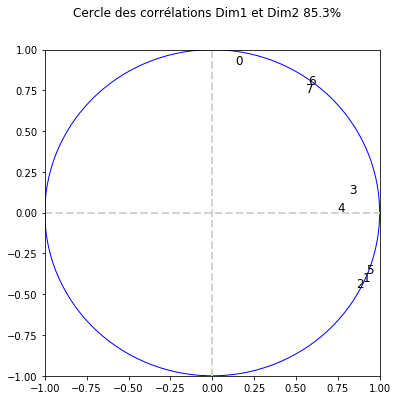

,Variable,COR_1,COR_2
0,aide_so,0.14,0.91
1,hypertension,0.90,-0.42
2,diabetes,0.86,-0.46
3,alcoolisme,0.82,0.12
4,handicap,0.75,0.01
5,Nb_caus_rdv,0.92,-0.37
6,SMS_recu,0.57,0.79
7,Present_rdv,0.56,0.74


In [43]:
## Ici encre, les deux premières dimensions nous suffiront
Cercle_Corr(df_age,1,2)

#### Commentaires : 
Les informations que nous apporte ce graphe :

<ul>
    <il>Une seule variable est fortement correlée positivement avec la variable <b>Present_rdv</b>, à savoir : <b>SMS_recu</b>.</il>

  <il> Les deux variables <b>hypertension</b> et <b>diabetes</b> sont toujours fortement correlées positivement, et elles le sont aussi avec une troisième variable <b>Nb_caus_rdv</b>. </il>

</ul>

#### Ce que l'on peut conclure : 
Lorsque nous regroupons tous les rendez-vous par rapport à l'âge des patients concernés, alors :
> *Il y a une très forte relation entre la **présence** des patients à leur rendez-vous et le fait qu'ils ont reçu un **SMS**.*

> *La majorité des patients, ayant beaucoup de pathologie, pour leur rendez-vous, sont surtout les **diabétiques** et les **hypertendus**.*

Nous allons maintenant essayer d'observer les relations entre les variables concernant les patients dans le même quartier que l'hôpital.

### Variable suivante à explorer : quart_hop

In [44]:
#regroupons d'abord nos données par quartier de l'hôpital
df_quartier = dfc.groupby('quart_hop')['aide_so','hypertension', 'diabetes', 'alcoolisme',
                               'handicap', 'SMS_recu', 'Nb_caus_rdv', 'Present_rdv'].sum()
df_quartier.head(3)

,aide_so,hypertension,diabetes,alcoolisme,handicap,SMS_recu,Nb_caus_rdv,Present_rdv
quart_hop,,,,,,,,
AEROPORTO,0,2,0,0,0,1,2,7
ANDORINHAS,323,586,299,52,91,567,1028,1741
ANTÔNIO HONÓRIO,14,5,3,0,1,93,9,221


In [45]:
Tableau_VP(df_quartier)

,Dimension,Valeur propre,% d'intertie,% d'inertie cum
0,Dim1,6.12,75.5,75.5
1,Dim2,1.04,12.8,88.4
2,Dim3,0.46,5.7,94.1
3,Dim4,0.30,3.6,97.8
4,Dim5,0.14,1.8,99.5
5,Dim6,0.03,0.4,99.9
6,Dim7,0.01,0.1,100.0
7,Dim8,0.00,0.0,100.0


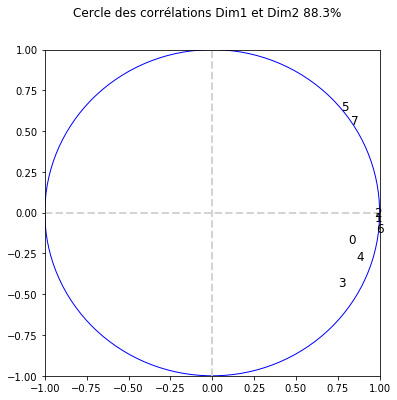

,Variable,COR_1,COR_2
0,aide_so,0.81,-0.19
1,hypertension,0.97,-0.05
2,diabetes,0.97,-0.02
3,alcoolisme,0.75,-0.45
4,handicap,0.86,-0.29
5,SMS_recu,0.77,0.63
6,Nb_caus_rdv,0.98,-0.12
7,Present_rdv,0.83,0.54


In [46]:
#Donc là une projection des deux première dimension suffira pour notre analyse
Cercle_Corr(df_quartier,1,2)

#### Commentaires : 
Ce graphe nous apporte presque les mêmes informations que le précédent cercle de correlation :

<ul>
   <il>Les variables <b>Present_rdv</b> et <b>SMS_recu</b> sont fortement correlées positivement.</il>

  <il> Les trois variables <b>hypertension</b>, <b>diabetes</b> et <b>Nb_caus_rdv</b> sont fortement correlées positivement. </il>
  
  <il> Nous pouvons aussi observé une légère correlation positive entre les variables <b>aide_so</b> et <b>handicap</b> </il>

</ul>

#### Ce que l'on peut conclure : 
Lorsque nous regroupons tous les rendez-vous en fonction du quartier de l'hôpital des patients concernés, alors :
> *La réception de **SMS** reste toujours le seule variable qui a une très forte relation par rapport à la **présence** des patients à leur rendez-vous.*

> *Toujours les mêmes remarques pour les **diabétiques** et les **hypertendus**.*

> *L'attribution des aides sociales sont d'une partie expliqué par le nombre d'handicap du patient concerné.*

Pour terminer notre analyse, nous allons voir ce que nous disent les variables temporelles.

### Variable suivante à explorer : jour_rdv et prise_rdv

In [80]:
df_date= dfc.groupby('jour_rdv')['aide_so','diabetes','hypertension', 'alcoolisme',
                               'handicap', 'SMS_recu', 'Present_rdv'].sum()
df_date.head()

,aide_so,diabetes,hypertension,alcoolisme,handicap,SMS_recu,Present_rdv
jour_rdv,,,,,,,
2016-04-29 00:00:00,320,241,617,103,74,1275,2602
2016-05-02 00:00:00,416,322,907,139,107,2284,3515
2016-05-03 00:00:00,468,315,889,128,113,1997,3425
2016-05-04 00:00:00,410,273,843,118,86,1642,3195
2016-05-05 00:00:00,447,304,873,121,98,1581,3466


In [81]:
Tableau_VP(df_date)

,Dimension,Valeur propre,% d'intertie,% d'inertie cum
0,Dim1,5.87,80.7,80.7
1,Dim2,0.91,12.6,93.3
2,Dim3,0.26,3.6,96.8
3,Dim4,0.12,1.6,98.5
4,Dim5,0.06,0.9,99.3
5,Dim6,0.03,0.4,99.7
6,Dim7,0.02,0.3,100.0


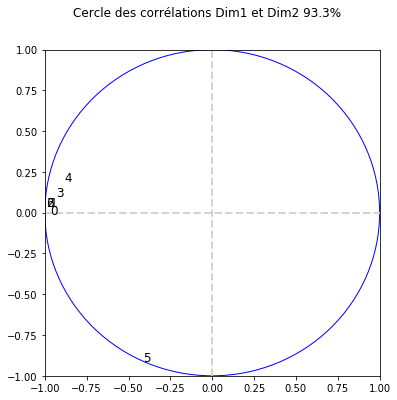

,Variable,COR_1,COR_2
0,aide_so,-0.97,-0.01
1,diabetes,-0.97,0.04
2,hypertension,-0.99,0.04
3,alcoolisme,-0.93,0.10
4,handicap,-0.88,0.19
5,SMS_recu,-0.41,-0.91
6,Present_rdv,-0.99,0.04


In [82]:
Cercle_Corr(df_date,1,2)

In [83]:
Tableau_distance(df_date)

,Variable,Distance
6,Present_rdv,0.00
2,hypertension,0.09
0,aide_so,0.15
1,diabetes,0.29
3,alcoolisme,0.40
4,handicap,0.49
5,SMS_recu,1.12


#### Commentaires : 
Ce graphe nous montre une forte correlation de trois variables avec la présence au rendez-vous : **hypertension** , **aide_so** et **Nb_caus_rdv**.

#### Ce que l'on peut conclure : 
Lorsque nous regroupons tous les rendez-vous en fonction de leur date, alors :

> *Il existe une forte **relation** entre le respect de **rendez-vous** des patients et le fait qu'ils soient **hypertendus** et aussi le fait qu'ils bénéficient **d'une aide sociale**.*

**Allons donc voir, pour terminer, ce que nous dis la variable : prise_rdv**

In [70]:
df_prise_rdv= dfc.groupby('prise_rdv')['aide_so','hypertension', 'alcoolisme',
                               'handicap', 'SMS_recu', 'Nb_caus_rdv', 'Present_rdv'].sum()
Tableau_VP(df_prise_rdv)

,Dimension,Valeur propre,% d'intertie,% d'inertie cum
0,Dim1,2.08,29.8,29.8
1,Dim2,1.04,14.9,44.7
2,Dim3,1.03,14.7,59.3
3,Dim4,0.98,14.0,73.3
4,Dim5,0.95,13.6,87.0
5,Dim6,0.85,12.1,99.0
6,Dim7,0.07,1.0,100.0


In [71]:
# Ici donc, il est directement préférable d'observer la distance des variables par rapport à la variables 
## Présence au rendez-vous sur plusieurs dimensions (ici, nous utilisons 5 dimensions, qui représente 87% des informations)

Tableau_distance(df_prise_rdv)

,Variable,Distance
6,Present_rdv,0.00
1,hypertension,1.09
0,aide_so,1.22
5,Nb_caus_rdv,1.22
3,handicap,1.38
2,alcoolisme,1.39
4,SMS_recu,1.45


#### Commentaires : 
Le jour et l'heure de la prise de rendez-vous des patients ne fait pas ressortir les variables qui expliquent leur absence à leur rendez-vous.

#### Ce que l'on peut conclure : 

> *Le jour et l'heure de la prise de rendez-vous ne fait pas ressortir les variables déterminantes en relation avec l'absence ou la présence des patients à leur rendez-vous.*

<a id='conclusions'></a>
## Conclusions
### Rappel :

Le but de notre analyse était d'expliquer les raisons par lesquelles certains patients se sont absentés à leur rendez-vous. Pour cela, nous avons posé une question fondamentale, qui est :  

***QUELLES SONT LES VARIABLES DETERMINANTES QUI PERMETTENT DE CLASSER LES PATIENTS QUI ONT REPECTE OU NON LEUR RENDEZ-VOUS, ET AINSI DONC PREDIRE, SI TEL PATIENT VIENDRAIT FORT PROBABLEMENT A UN RENDEZ-VOUS OU PAS ?***


Afin de répondre à cette question, nous avons posé deux autres questions :

> **Question 1 : Est ce qu'il y aurait une relation entre la tendance du non respect de RDV et les autres variables :**

    Genre
    Inscription aux aides sociales
    SMS reçu
    Age
    Les différentes pathologies : Hypertension, Alcoolisme, Diabetes, Handicape
    Le nombre de cause maladive pour le RDV (Hypertension, Alcoolisme, Diabetes, Handicape)

> **Question 2 : Est ce qu'il y a une relation entre la tendance du non respect de RDV et/ou plusieurs variables ?**
>>

La première question consistait à trouver une relation des autres variables (une par une) avec la présence des patients à leur rendez-vous.

La seconde question consistait à trouver des relations entre les autres variables avec la présence des patients à leur rendez-vous.

### Résultats et constats :

Pour la **Question 1**, nous n'avions pas pu identifier une relation statistiquement fiable par rapport à l'une des variables citées ci-dessus avec la présence des patients à leur rendez-vous, lorsque nous les avions testé une par une. La proportion des rendez-vous respectés, selon les différentes classes pour chaque variable, ne s'est éloignées pas trop de la proportion de toutes les rendez-vous respectés.


Pour la **Question 2**, nous avions pu observer des résultats plus intéressantes, en utilisant les ACP :

> *Lorsque nous avions regrouper les rendez-vous selon l'âge des patients ou le quartier de l'hôpital, deux résultats en sont ressortis* :

<ul>
    <li> La <b>présence</b> des patients à leur <b>rendez-vous</b> est très <b>liée</b> par le fait qu'ils ont reçu un <b>SMS</b>  </li>
    
   <li>Les deux pathologies, <b>hypertension</b> et <b>diabètes</b>, sont très liées </li>
</ul>

> *Lorsque nous avions regrouper les rendez-vous selon leur date, nous avions pu constater une **forte relation** entre les patients **respectant leur rendez-vous** et ceux qui sont **hypertendus** et/ou bénéficiant d'**aide sociale**.* 


### Réponse à la question fondamentale :
*Les résultats nous ont donc permis de mettre en avant les **relations entre** la **présence des patients** à leur rendez-vous ainsi que certaines variables, à savoir : leur **âge**, le **quartier** où se trouve l'**hôpital** et le fait qu'ils aient reçu un **SMS**.*

*Ils nous ont aussi permis d'évoquer une **forte relation** entre deux pathologie de maladie : L'**hypertension** et le **diabètes**.*
>

**ATTENTION :** Ici nous n'affirmons pas que les 4 variables, en relations avec le respect de rendez-vous, permettent de classifier les patients par rapport à leur absence ou présence, mais souligne leur forte relation.***Cela est donc une piste sérieuse pour aboutir aux variables exhaustives permettant cette classification.***

### Perspective d'amélioration :
Puisque la finalité de l'analyse, pour répondre concrètement à notre question fondamentale, nécessite des méthodes plus pousées en analyse de données, à savoir : la **classification** (pour classer les patients assidus et non à leur rendez-vous) et surtout les **regressions**(pour la prédiction des patients susceptibles de s'absenter).

Pour cela, une méthode très adaptée à ce cas peut être utilisé, qui est la <a href="https://www.ibm.com/ca-fr/topics/logistic-regression"> regression logistique binaire</a>(Présent ou Absent)


In [4]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0